# Versuch 251 Statistik - Auswertung
#### Felix Fleischle - 23.2.2022

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
#Zaehlrohrspannung:
U=np.array([450,475,500,525,550,575,600])
#U_err = np.array([10, 5, 5, 5, 5, 5, 5])
#gezaehlte Ereignisse
N=np.array([2496,2559,2498,2641,2501,2619,2630])
Fehler_N=np.sqrt(N)

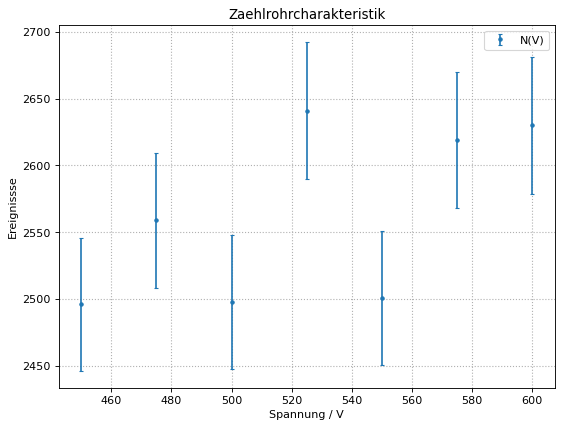

In [55]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(U, N, Fehler_N, fmt=".", label="N(V)",linestyle="none", capsize = 2)
plt.xlabel("Spannung / V")
plt.ylabel("Ereignissse")
plt.title("Zaehlrohrcharakteristik")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [57]:
def linear(x,a,b):
    return a*x+b

popt, pcov=curve_fit(linear, U[1:], N[1:])

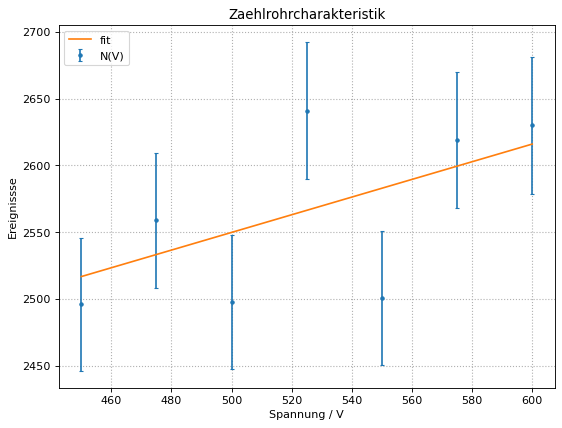

In [58]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(U, N, Fehler_N, fmt=".", label="N(V)",linestyle="none", capsize = 2)
plt.xlabel("Spannung / V")
plt.ylabel("Ereignissse")
plt.title("Zaehlrohrcharakteristik")
plt.plot(U, linear(U,*popt), label="fit")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
# error wegen zu hoher anfangspannung, weniger messpunkte

In [59]:
# 2. Plateaubereich
N_array_p = np.array([12658, 37394, 12750, 37752])
N_array_p_err = np.sqrt(N_array_p)
print(N_array_p_err)

t_array_p = np.array([60, 180, 60, 180])

n_array_p = N_array_p / t_array_p
n_array_p_err = N_array_p_err / t_array_p

print("Zählraten:", n_array_p, "+-", n_array_p_err)

[112.50777751 193.37528281 112.91589791 194.29873906]
Zählraten: [210.96666667 207.74444444 212.5        209.73333333] +- [1.87512963 1.07430713 1.88193163 1.07943744]


In [10]:
# Plateauanstiege:
a_1m = n_array_p[2]-n_array_p[0]
a_1m_err = np.sqrt(n_array_p_err[2]**2 + n_array_p_err[0]**2)

a_3m = n_array_p[3]-n_array_p[1]
a_3m_err = np.sqrt(n_array_p_err[3]**2 + n_array_p_err[1]**2)

print("Plateauanstieg 1m:", a_1m, "+-", a_1m_err, "[1/s]")
print("Plateauanstieg 3m:", a_3m, "+-", a_3m_err, "[1/s]")

Plateauanstieg 1m: 1.5333333333333314 +- 2.6566478460228367 [1/s]
Plateauanstieg 3m: 1.98888888888888 +- 1.5229317081387206 [1/s]


In [12]:
# Prozentuale Anstiege:
a_proz_1m = a_1m / n_array_p[0]
a_proz_1m_err = np.sqrt((a_1m_err / n_array_p[0])**2 + (a_1m * n_array_p_err[0] / (n_array_p[0])**2)**2)

a_proz_3m = a_3m / n_array_p[1]
a_proz_3m_err = np.sqrt((a_3m_err / n_array_p[1])**2 + (a_3m * n_array_p_err[1] / (n_array_p[1])**2)**2)

print("Prozentualer Anstieg 1m:", a_proz_1m, "+-", a_proz_1m_err)
print("Prozentualer Anstieg 3m:", a_proz_3m, "+-", a_proz_3m_err)

Prozentualer Anstieg 1m: 0.007268130826354865 +- 0.012592903161280705
Prozentualer Anstieg 3m: 0.009573728405626529 +- 0.007330961086002894


In [13]:
# Prüfe Signifikanz
sigma_1m = a_1m / a_1m_err
sigma_3m = a_3m / a_3m_err

sigma_proz_1m = a_proz_1m / a_proz_1m_err
sigma_proz_3m = a_proz_3m / a_proz_3m_err

print("Abweichungen:", sigma_1m, sigma_3m, sigma_proz_1m, sigma_proz_3m)

Abweichungen: 0.5771684552127693 1.3059606535605184 0.5771608606268114 1.305930872270729


In [14]:
# Zeit für 99% Genauigkeit



In [41]:
anzahl, haeufigkeit=np.loadtxt("C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/251/ff251.dat", unpack=True)
fehler=np.sqrt(haeufigkeit)

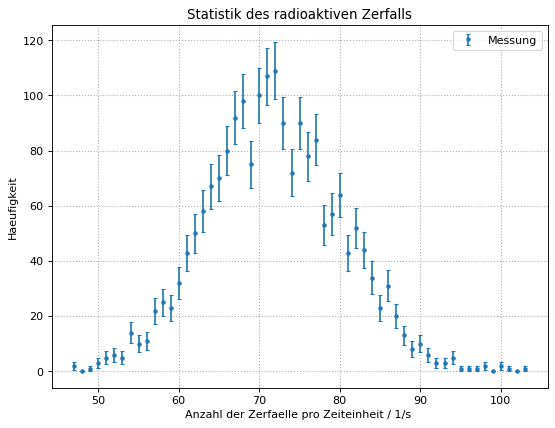

In [19]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", label="Messung",linestyle="none", capsize = 2)
plt.xlabel("Anzahl der Zerfaelle pro Zeiteinheit / 1/s ")
plt.ylabel("Haeufigkeit")
plt.title("Statistik des radioaktiven Zerfalls")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [22]:
from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

In [35]:
popt, pcov=curve_fit(gaussian,anzahl[7:-15], haeufigkeit[7:-15], p0=[2000,71.802,8.304],sigma=fehler[7:-15])

In [36]:
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[7:-15], haeufigkeit[7:-15], p0=[2000, 71.802], sigma=fehler[7:-15])

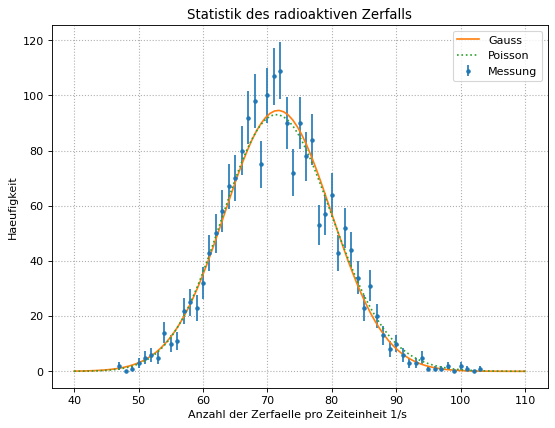

In [37]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(anzahl,haeufigkeit,fehler, fmt=".",label="Messung")
plt.xlabel("Anzahl der Zerfaelle pro Zeiteinheit 1/s ")
plt.ylabel("Haeufigkeit")
plt.title("Statistik des radioaktiven Zerfalls")
x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label="Gauss")
plt.plot(x, poisson(x,*popt_p), label="Poisson",linestyle=":")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [32]:
print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))

Gaussfit:
A= 2055.456962967929 , Standardfehler= 74.28181108405421
mu= 71.17116635258937 , Standardfehler= 0.38703958053909415
sig= 8.813745438567022 , Standardfehler= 0.3942019242008836
Poissonfit:
A_p= 2006.7285578911371 , Standardfehler= 52.41450614566358
mu_p= 71.6186605770376 , Standardfehler= 0.28707795085788756


In [38]:
#Gauss:
chi2_g=np.sum((gaussian(anzahl[7:-15],*popt)
-haeufigkeit[7:-15])**2/fehler[7:-15]**2)
dof_g=len(anzahl[7:-15])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson:
chi2_p=np.sum((poisson(anzahl[7:-15],*popt_p)
-haeufigkeit[7:-15])**2/fehler[7:-15]**2)
dof_p=len(anzahl[7:-15])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

chi2_g= 38.646714538610645
chi2_red_g= 1.2077098293315827
chi2_p= 36.37555224795676
chi2_red_p= 1.1022894620592958


In [39]:
from scipy.stats import chi2
#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

Wahrscheinlichkeit Gauss= 19.0 %
Wahrscheinlichkeit Poisson= 31.0 %


In [43]:
anzahl2, haeufigkeit2=np.loadtxt("C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/251/ff251p.dat", unpack=True)
fehler2=np.sqrt(haeufigkeit2)

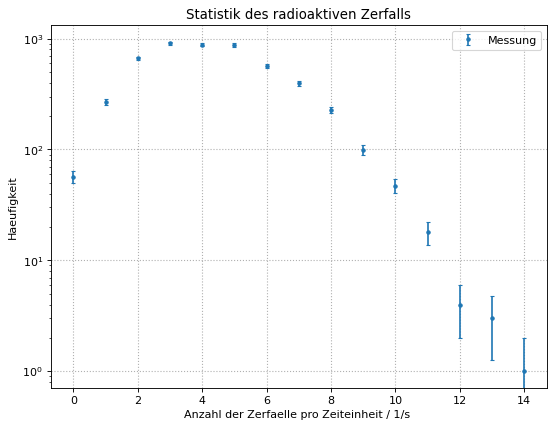

In [46]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(anzahl2, haeufigkeit2, fehler2, fmt=".", label="Messung",linestyle="none", capsize = 2)
plt.xlabel("Anzahl der Zerfaelle pro Zeiteinheit / 1/s ")
plt.ylabel("Haeufigkeit")
plt.title("Statistik des radioaktiven Zerfalls")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.yscale("log")

In [48]:
popt2, pcov2=curve_fit(gaussian,anzahl2, haeufigkeit2, p0=[2000,4.3627,2.1066],sigma=fehler2)
popt_p2, pcov_p2 = curve_fit(poisson, anzahl2, haeufigkeit2, p0=[2000, 4.3627], sigma=fehler2)

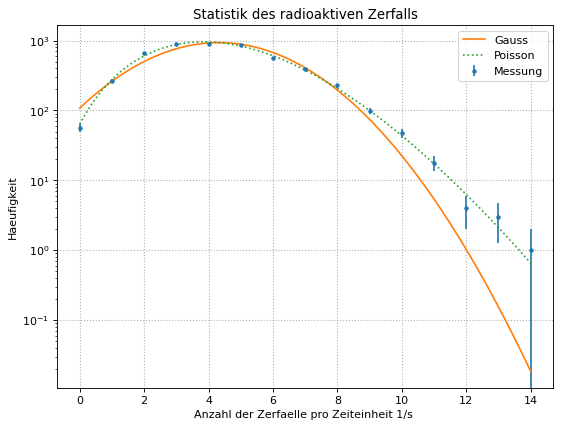

In [51]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(anzahl2,haeufigkeit2,fehler2, fmt=".",label="Messung")
plt.xlabel("Anzahl der Zerfaelle pro Zeiteinheit 1/s ")
plt.ylabel("Haeufigkeit")
plt.title("Statistik des radioaktiven Zerfalls")
x2=np.linspace(0,14, 100)
plt.plot(x2, gaussian(x2,*popt2), label="Gauss")
plt.plot(x2, poisson(x2,*popt_p2), label="Poisson",linestyle=":")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.yscale("log")

In [52]:
print("Gaussfit:")
print("A=",popt2[0], ", Standardfehler=", np.sqrt(pcov2[0][0]))
print("mu=",popt2[1], ", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig=",popt2[2], ", Standardfehler=", np.sqrt(pcov2[2][2]))
print("Poissonfit:")
print("A_p=",popt_p2[0], ", Standardfehler=", sqrt(pcov_p2[0][0]))
print("mu_p=",popt_p2[1], ", Standardfehler=", sqrt(pcov_p2[1][1]))

Gaussfit:
A= 4880.618364919234 , Standardfehler= 263.4052645424769
mu= 4.319947479207991 , Standardfehler= 0.1161854876427094
sig= 2.0797512672049177 , Standardfehler= 0.09118277576423389
Poissonfit:
A_p= 4979.022650036269 , Standardfehler= 94.34235603634134
mu_p= 4.3608713967481885 , Standardfehler= 0.03988023721359042


In [53]:
#Gauss:
chi2_g2=np.sum((gaussian(anzahl2,*popt2)
-haeufigkeit2)**2/fehler2**2)
dof_g2=len(anzahl2)-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g2=chi2_g2/dof_g2
print("chi2_g=", chi2_g2)
print("chi2_red_g=",chi2_red_g2)
#Poisson:
chi2_p2=np.sum((poisson(anzahl2,*popt_p2)
-haeufigkeit2)**2/fehler2**2)
dof_p2=len(anzahl2)-2 #poisson hat nur 2 Parameter
chi2_red_p2=chi2_p2/dof_p2
print("chi2_p=", chi2_p2)
print("chi2_red_p=",chi2_red_p2)

chi2_g= 168.42931720606194
chi2_red_g= 14.035776433838494
chi2_p= 23.23752963789556
chi2_red_p= 1.78750227983812


In [54]:
#Gauss:
prob_g2=round(1-chi2.cdf(chi2_g2,dof_g2),2)*100
#Poisson:
prob_p2=round(1-chi2.cdf(chi2_p2,dof_p2),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g2,"%")
print("Wahrscheinlichkeit Poisson=", prob_p2,"%")

Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit Poisson= 4.0 %
